In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Online Sales Data (Zeyad).csv')

df.shape

(1155, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB


In [5]:
df.sample(10, random_state=5) 

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
715,10716,2024-04-29,Clothing,NaN,1,3629.22,3629.22,Europe,Credit Card
1075,11076,2024-07-30,Clothing,NaN,4,406.4,1625.60,North America,Credit Card
515,10516,2025-03-07,Electronics,NaN,2,667.07,1334.14,North America,Credit Card
723,10724,2024-03-02,Beauty Products,NaN,4,351.97,1407.88,North America,NaN
788,10789,2024-01-26,Sports,Sports Lite 380,2,34.1,68.20,Asia,Gift Card
849,10850,2024-08-19,Home Appliances,LG OLED TV,231,20.39,4710.09,North America,NaN
283,10284,2024-02-07,Home Appliances,NaN,3,733.95,2201.85,Europe,NaN
1141,10590,2024-03-09,Beauty Products,NaN,5,1101.04,5505.20,North America,Credit Card
427,10428,2024-03-19,Electronics,NaN,475,700.98,332965.50,North America,PayPal
810,10811,2024-10-18,Beauty Products,NaN,3,588.78,1766.34,Asia,Credit Card


In [6]:
df.describe()

,Transaction ID,Total Revenue
count,1155.000000,1.155000e+03
mean,10554.246753,1.531362e+04
std,318.133931,9.172878e+04
min,10001.000000,8.600000e-01
25%,10277.500000,5.831000e+01
50%,10555.000000,4.499900e+02
75%,10831.500000,1.209760e+03
max,11100.000000,2.019764e+06


In [7]:
print(df["Product Category"].value_counts(dropna=False))
print("Unique Categories:", df["Product Category"].nunique())
print("------------------------------------------------------")
print(df['Region'].value_counts(dropna=False))
print("Unique Regions:", df["Region"].nunique())
print("------------------------------------------------------")
print(df['Payment Method'].value_counts(dropna=False))
print("Unique Payment Method",df["Payment Method"].nunique())



Product Category
Electronics        202
Sports             193
Clothing           192
Books              192
Beauty Products    190
Home Appliances    186
Name: count, dtype: int64
Unique Categories: 6
------------------------------------------------------
Region
North America    384
Europe           379
Asia             371
NaN               21
Name: count, dtype: int64
Unique Regions: 3
------------------------------------------------------
Payment Method
Credit Card       478
PayPal            286
NaN               172
Debit Card        161
Cryptocurrency     20
Mobile Payment     15
Gift Card          15
Bank Transfer       8
Name: count, dtype: int64
Unique Payment Method 7


In [8]:
print(df["Date"].min())
print(df["Date"].max())
print("intial information not accurate")

2024-01-01
2025-04-23
intial information not accurate


In [9]:
df.isnull().sum()

Transaction ID        0
Date                  0
Product Category      0
Product Name        923
Units Sold          173
Unit Price            0
Total Revenue         0
Region               21
Payment Method      172
dtype: int64

In [10]:
total_rows=len(df)
missing =pd.DataFrame({'column_name':df.columns,
                      'number_of_missing':df.isnull().sum().values,
                      'percentage_of_missing':((df.isnull().sum().values/total_rows)*100).round(2)})
missing

,column_name,number_of_missing,percentage_of_missing
0,Transaction ID,0,0.00
1,Date,0,0.00
2,Product Category,0,0.00
3,Product Name,923,79.91
4,Units Sold,173,14.98
5,Unit Price,0,0.00
6,Total Revenue,0,0.00
7,Region,21,1.82
8,Payment Method,172,14.89


<Axes: >

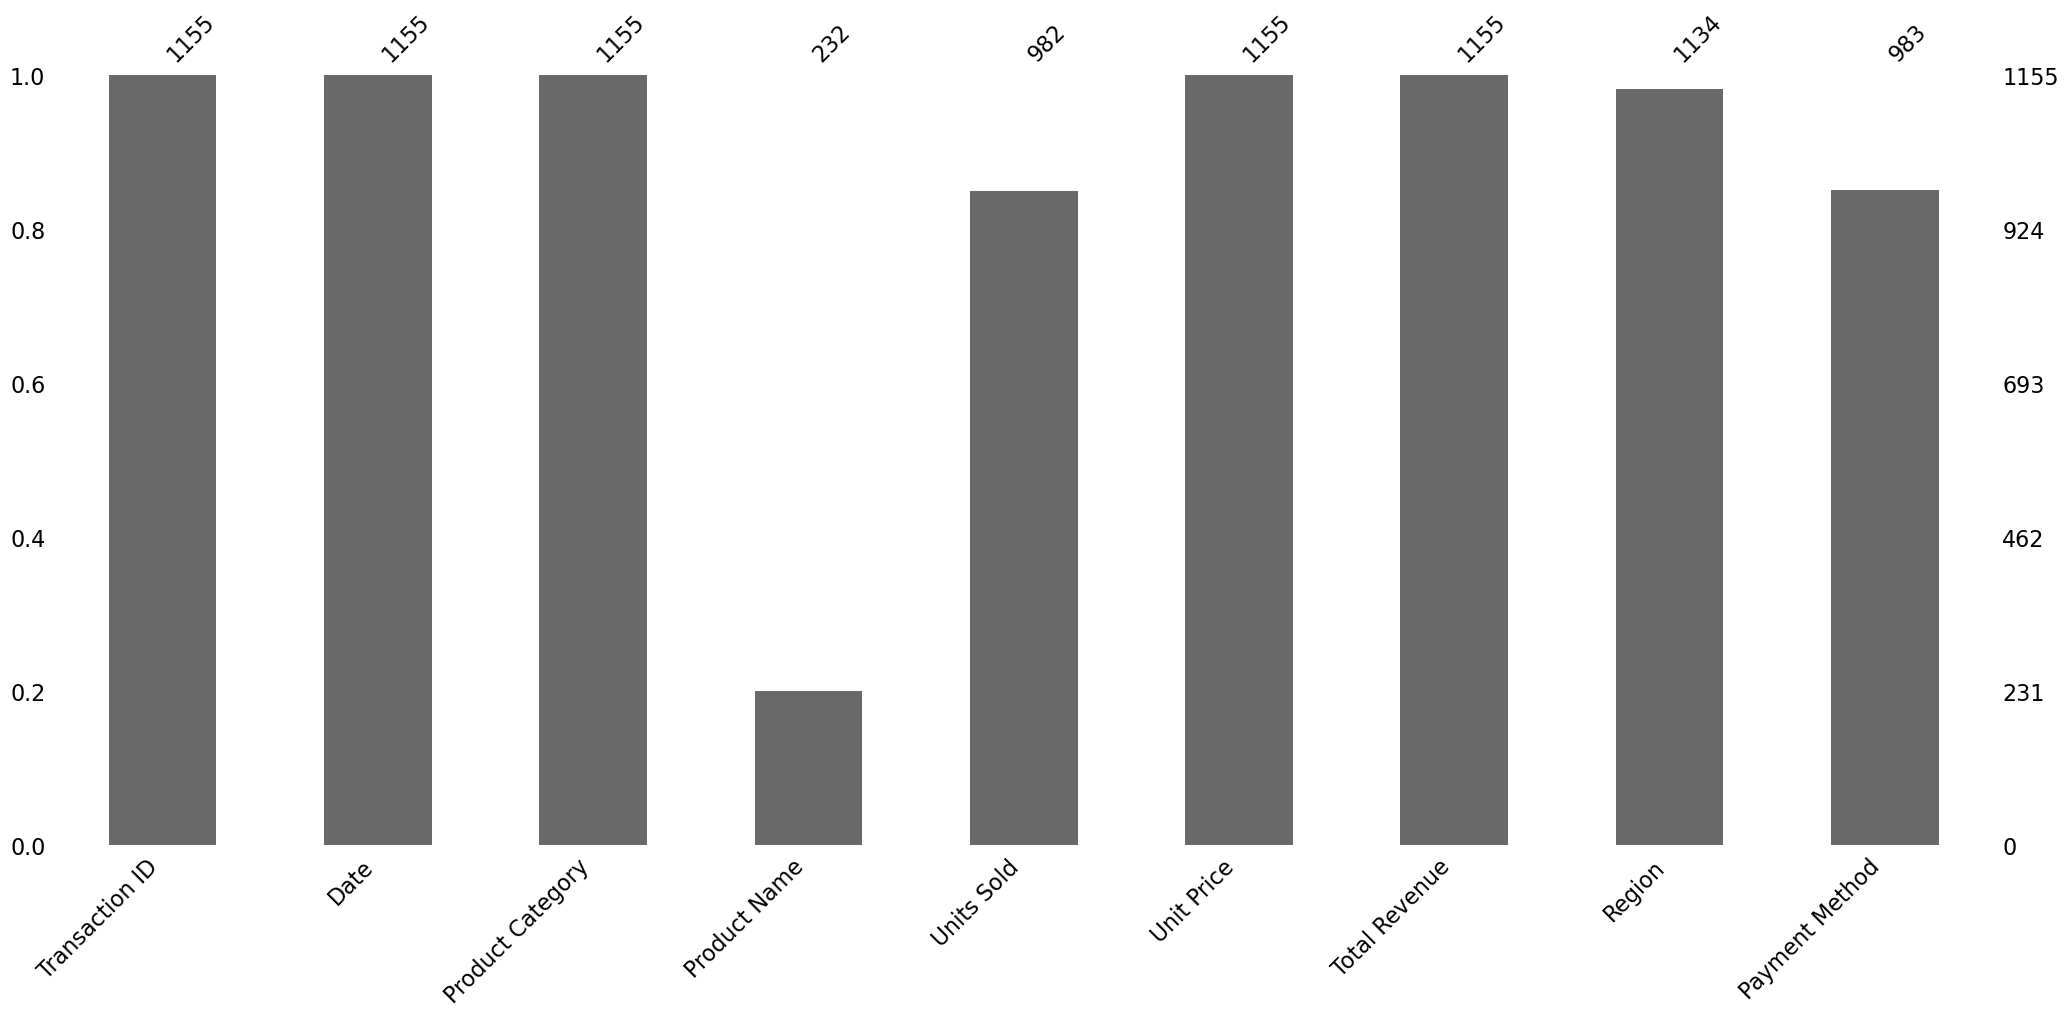

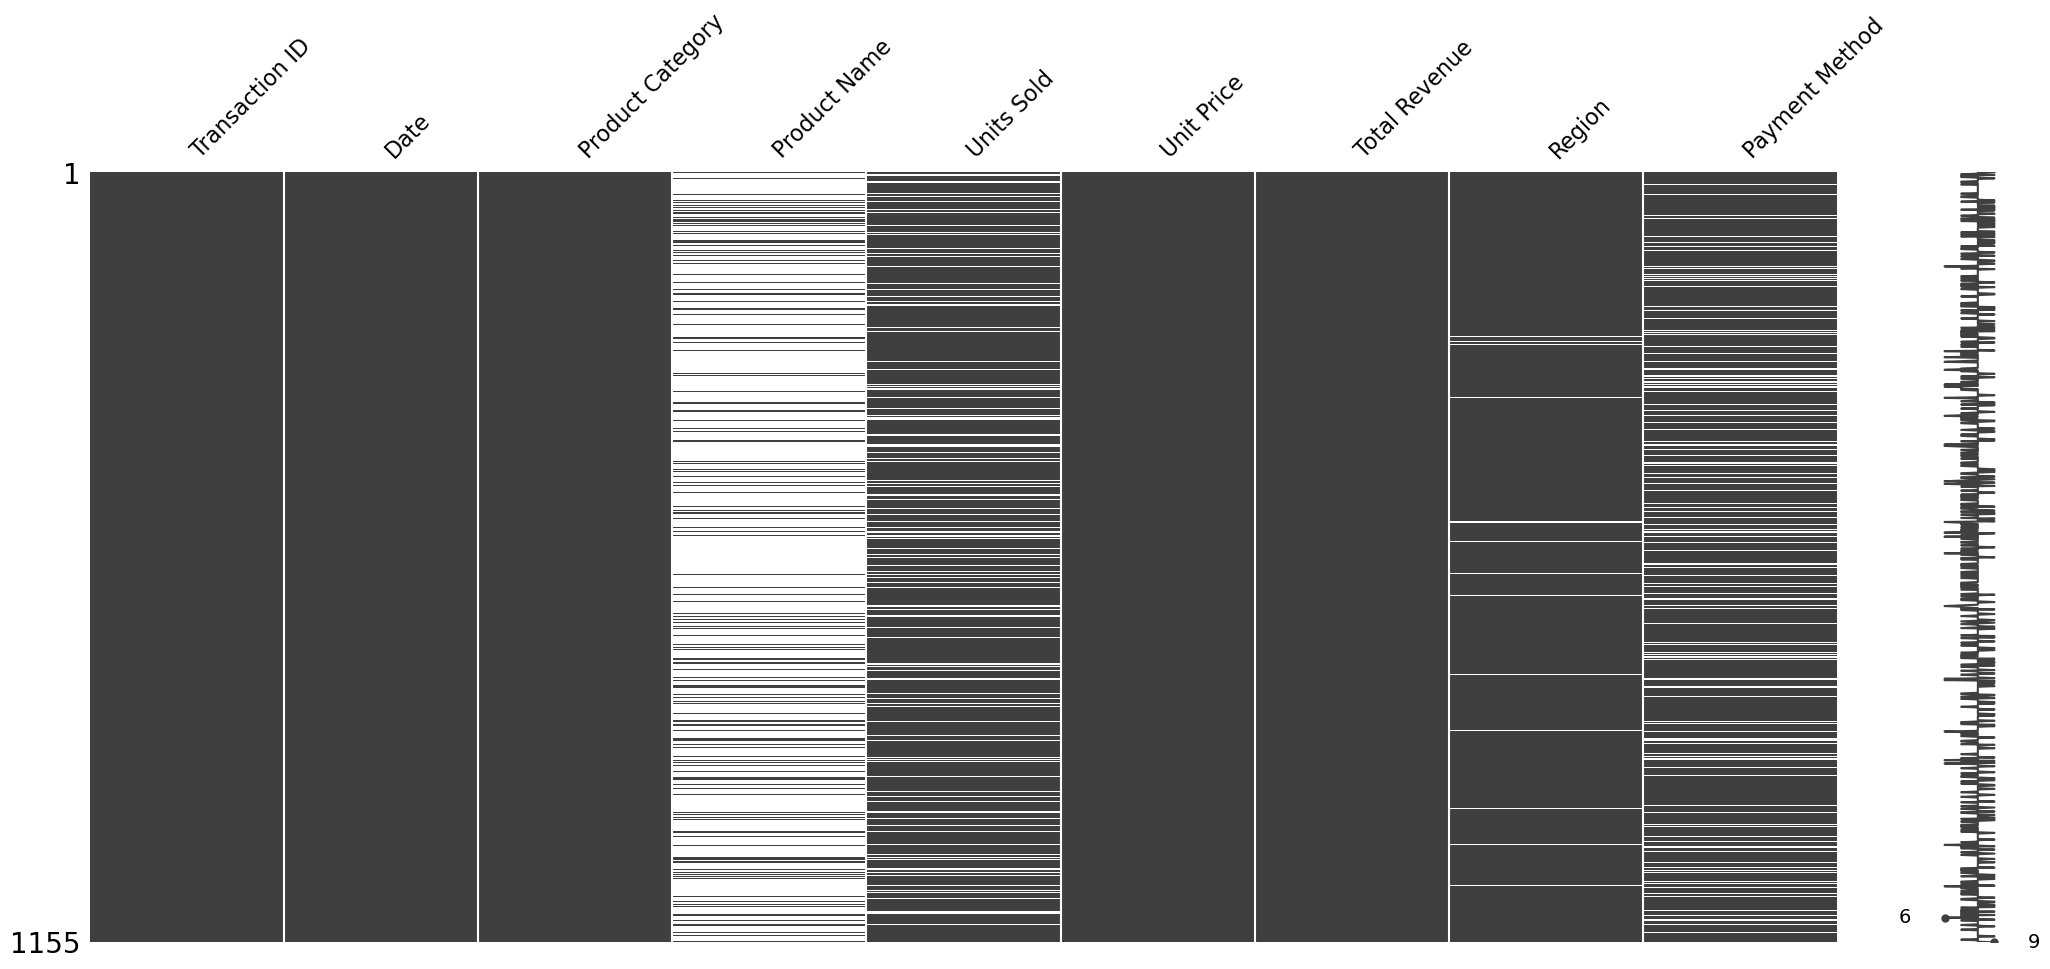

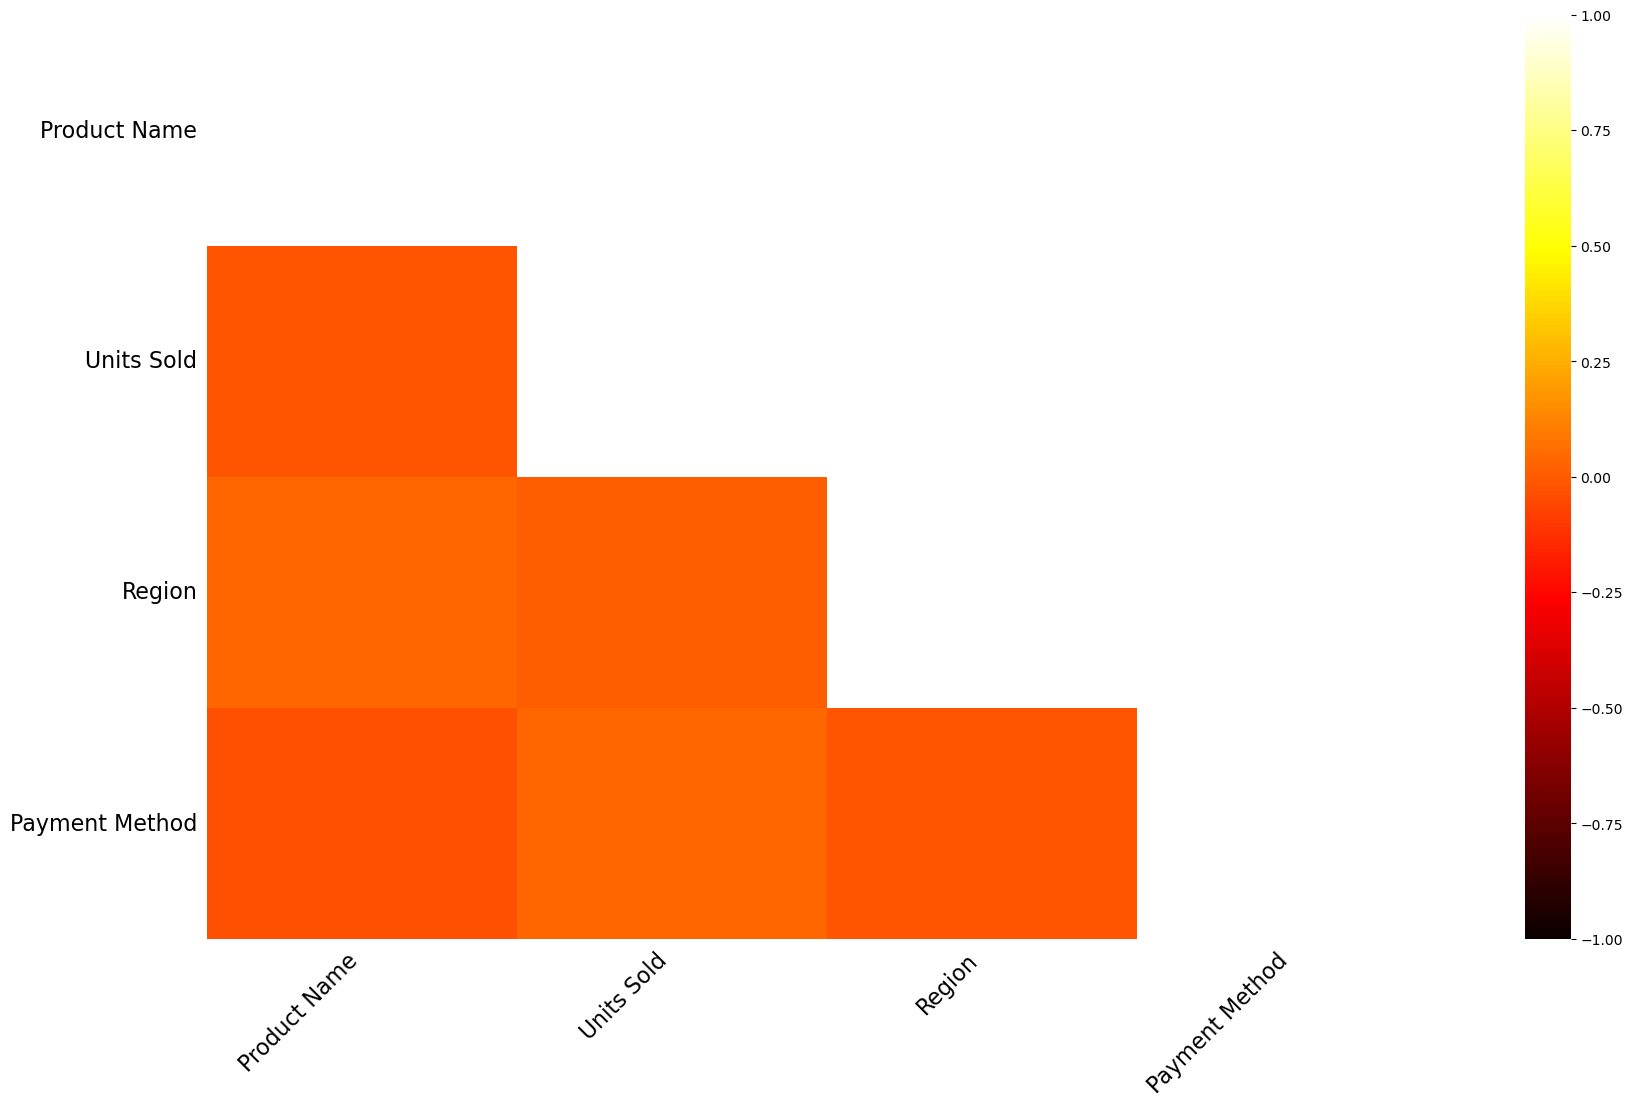

In [11]:
msno.bar(df)
msno.matrix(df)
msno.heatmap(df,cmap="hot")

In [12]:
missing_regions=df[df['Region'].isnull()]
print(missing_regions['Product Category'].value_counts(dropna=False))
print("--------------------------------------------------")    
print(missing_regions['Payment Method'].value_counts(dropna=False))
missing_regions

Product Category
Clothing           7
Electronics        5
Beauty Products    4
Books              4
Sports             1
Name: count, dtype: int64
--------------------------------------------------
Payment Method
Cryptocurrency    10
Bank Transfer      5
Mobile Payment     4
NaN                2
Name: count, dtype: int64


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
246,10247,2024-11-17,Electronics,NaN,2,613.95,1227.90,NaN,Bank Transfer
254,10255,2024-03-11,Beauty Products,NaN,2,617.64,1134.44,NaN,Mobile Payment
258,10259,2025-01-03,Electronics,NaN,3,812.65,2437.95,NaN,Mobile Payment
268,10269,2025-01-05,Books,NaN,1,673.84,673.84,NaN,NaN
338,10339,2025-03-12,Electronics,NaN,NaN,233.39,466.78,NaN,Cryptocurrency
403,10404,2025-03-09,Books,NaN,1,3146.29,3146.29,NaN,Cryptocurrency
499,10500,2024-08-18,Clothing,NaN,1,931.0,931.00,NaN,Cryptocurrency
508,10509,2024-09-26,Clothing,NaN,1,326.21,326.21,NaN,Bank Transfer
524,10525,2024-08-27,Clothing,NaN,NaN,1.0,3.00,NaN,Cryptocurrency
525,10526,2024-08-22,Electronics,NaN,2,327.05,654.10,NaN,Mobile Payment


In [13]:
missing_units_sold=df[df['Units Sold'].isnull()]
print(missing_units_sold['Region'].value_counts(dropna=False))
print("--------------------------------------------------") 
print(missing_units_sold['Product Category'].value_counts(dropna=False))

Region
Asia             61
North America    54
Europe           54
NaN               4
Name: count, dtype: int64
--------------------------------------------------
Product Category
Electronics        34
Clothing           33
Beauty Products    32
Home Appliances    28
Sports             25
Books              21
Name: count, dtype: int64


In [14]:
missing_payment_method=df[df['Payment Method'].isnull()]
print(missing_payment_method['Region'].value_counts(dropna=False))
print("--------------------------------------------------") 
print(missing_payment_method['Product Category'].value_counts(dropna=False))

Region
North America    68
Europe           54
Asia             48
NaN               2
Name: count, dtype: int64
--------------------------------------------------
Product Category
Books              55
Electronics        33
Home Appliances    26
Sports             25
Beauty Products    17
Clothing           16
Name: count, dtype: int64


In [15]:
check_books=df[(df['Region']=='North America')&(df['Product Category']=='Books')]
h1=check_books['Payment Method'].isnull().sum()
h1

26

In [16]:
check_books1=df[(df['Region']=='Europe')&(df['Product Category']=='Books')]
h2=check_books1['Payment Method'].isnull().sum()
h2

18

In [17]:
check_books=df[(df['Region']=='North America')&(df['Product Category']=='Books')]
h3=check_books['Payment Method'].value_counts(dropna=False)
h3

Payment Method
Credit Card       49
NaN               26
PayPal            12
Debit Card         4
Cryptocurrency     2
Name: count, dtype: int64

In [18]:
check_books1=df[(df['Region']=='Europe')&(df['Product Category']=='Books')]
h4=check_books1['Payment Method'].value_counts(dropna=False)
h4

Payment Method
Credit Card       20
NaN               18
PayPal            10
Debit Card         8
Mobile Payment     1
Name: count, dtype: int64

In [19]:
check_books2=df[(df['Region']=='Europe')&(df['Product Category']=='Books')].shape[0]
check_books2

57

In [20]:
pd.crosstab(
    [df['Region'], df['Product Category']], 
    df['Payment Method'], 
    dropna=False
)


Payment Method                  Bank Transfer  Credit Card  Cryptocurrency  \
Region        Product Category                                               
Asia          Beauty Products               0           25               0   
              Books                         0           10               1   
              Clothing                      0           16               1   
              Electronics                   0           20               0   
              Home Appliances               0           24               1   
              Sports                        0           60               1   
Europe        Beauty Products               0           17               0   
              Books                         0           20               0   
              Clothing                      0           26               0   
              Electronics                   0           24               0   
              Home Appliances               1           15               0   
              Sports                        0           19               1   
North America Beauty Products               0           24               1   
              Books                         0           49               2   
              Clothing                      0           31               0   
              Electronics                   1           51               0   
              Home Appliances               0           23               0   
              Sports                        1           24               2   
NaN           Beauty Products               1            0               2   
              Books                         0            0               3   
              Clothing                      2            0               3   
              Electronics                   1            0               2   
              Home Appliances               0            0               0   
              Sports                        1            0               0   

Payment Method                  Debit Card  Gift Card  Mobile Payment  PayPal  \
Region        Product Category                                                  
Asia          Beauty Products           10          3               0      13   
              Books                      2          3               2      10   
              Clothing                  45          0               0       7   
              Electronics                9          0               0      18   
              Home Appliances            8          0               0      14   
              Sports                     4          2               2      12   
Europe        Beauty Products            7          1               1      49   
              Books                      8          0               1      10   
              Clothing                   8          1               0      15   
              Electronics                9          0               0      10   
              Home Appliances            9          0               2      52   
              Sports                     7          0               0      12   
North America Beauty Products           10          0               1       7   
              Books                      4          0               0      12   
              Clothing                   7          2               0      11   
              Electronics                2          0               1      19   
              Home Appliances            5          0               0       6   
              Sports                     7          3               1       9   
NaN           Beauty Products            0          0               1       0   
              Books                      0          0               0       0   
              Clothing                   0          0               1       0   
              Electronics                0          0               2       0   
              Home Applianc

In [21]:
df['Units Sold']= df['Units Sold'].str.replace(r"[^0-9.]", "", regex=True).astype(float)

#df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df["Unit Price"] = df["Unit Price"].str.replace(r"[^0-9.]", "", regex=True).astype(float)

In [22]:
mask_units= df['Units Sold'].isna() & df['Unit Price'].notna() & df['Total Revenue'].notna() & (df['Unit Price']!=0)
df.loc[mask_units, 'Units Sold']= (df.loc[mask_units, 'Total Revenue'] / df.loc[mask_units, 'Unit Price']).round()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        1155 non-null   float64
 5   Unit Price        1155 non-null   float64
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 81.3+ KB


In [24]:
df=df.drop(columns="Product Name")

In [25]:
df['Region']=df['Region'].fillna(df['Region'].mode()[0])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Units Sold        1155 non-null   float64
 4   Unit Price        1155 non-null   float64
 5   Total Revenue     1155 non-null   float64
 6   Region            1155 non-null   object 
 7   Payment Method    983 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 72.3+ KB


In [27]:
pm_mode_transform=df.groupby(['Region','Product Category'])['Payment Method'] \
    .transform(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)

df['Payment Method']=df['Payment Method'].fillna(pm_mode_transform)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Units Sold        1155 non-null   float64
 4   Unit Price        1155 non-null   float64
 5   Total Revenue     1155 non-null   float64
 6   Region            1155 non-null   object 
 7   Payment Method    1155 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 72.3+ KB


In [29]:
df['Date'] = df['Date'] + " 00:00:00"
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Units Sold'] = df['Units Sold'].astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18792\3343616371.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1155 non-null   int64         
 1   Date              1155 non-null   datetime64[ns]
 2   Product Category  1155 non-null   object        
 3   Units Sold        1155 non-null   int32         
 4   Unit Price        1155 non-null   float64       
 5   Total Revenue     1155 non-null   float64       
 6   Region            1155 non-null   object        
 7   Payment Method    1155 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 67.8+ KB


In [31]:
df.duplicated().sum()

36

In [32]:
duplication=df[df.duplicated()]
duplication.head(37)

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1100,10253,2024-12-01,Clothing,3,1.00,3.00,Europe,Credit Card
1101,10390,2025-02-09,Sports,495,639.75,316676.25,North America,Credit Card
1103,11098,2024-06-14,Electronics,4,1169.38,4677.52,Asia,PayPal
1104,10703,2024-12-02,Books,2,434.06,868.12,Europe,PayPal
1105,10536,2024-08-01,Electronics,2,680.51,1361.02,North America,Credit Card
1106,10167,2024-06-15,Beauty Products,1,16.99,16.99,Europe,PayPal
1108,10078,2024-03-18,Sports,3,69.99,209.97,Asia,Credit Card
1109,10885,2024-10-02,Sports,1,244.97,244.97,North America,Credit Card
1110,11046,2024-08-10,Beauty Products,2,1.00,2.00,Asia,Debit Card
1111,10941,2024-02-21,Sports,2,1.00,2.00,Europe,PayPal


In [33]:
df['Transaction ID'].value_counts()

Transaction ID
10941    3
10703    2
10373    2
10997    2
10190    2
        ..
10381    1
10382    1
10383    1
10384    1
11100    1
Name: count, Length: 1100, dtype: int64

In [34]:
df = df.drop_duplicates(subset=['Transaction ID'])

In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1100 non-null   int64         
 1   Date              1100 non-null   datetime64[ns]
 2   Product Category  1100 non-null   object        
 3   Units Sold        1100 non-null   int32         
 4   Unit Price        1100 non-null   float64       
 5   Total Revenue     1100 non-null   float64       
 6   Region            1100 non-null   object        
 7   Payment Method    1100 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 73.0+ KB


In [37]:
j=df[(df['Total Revenue'] <= 0)]
j

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method


In [38]:
u=df[(df['Unit Price'] <= 0)]
u

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method


In [39]:
s=df[(df['Units Sold'] <= 0)]
s

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method


In [40]:
df.groupby('Date').size().sort_values(ascending=False).head(30)


Date
2024-05-07    8
2024-07-13    6
2024-02-04    6
2024-11-10    6
2024-06-12    6
2024-01-11    6
2024-09-26    6
2024-01-05    6
2024-02-21    6
2024-08-18    5
2024-12-16    5
2024-07-15    5
2024-02-25    5
2024-03-02    5
2024-05-01    5
2024-10-18    5
2024-03-12    5
2024-02-22    5
2025-02-01    5
2024-07-29    5
2025-02-11    5
2024-01-26    5
2024-05-29    5
2025-02-09    5
2025-02-20    5
2024-07-30    5
2024-08-14    5
2024-08-22    5
2024-08-26    5
2024-05-25    5
dtype: int64

In [41]:
df['Units Sold'].value_counts()

Units Sold
1      435
2      308
3      183
4       73
5       15
      ... 
216      1
429      1
475      1
239      1
228      1
Name: count, Length: 83, dtype: int64

In [42]:
df = df[df['Units Sold'] <= 15]

In [43]:
def detect_outliers(group):
    mean = group['Total Revenue'].mean()
    std = group['Total Revenue'].std()
    upper = mean + 3*std
    lower = mean - 3*std
    group['outlier'] = ~group['Total Revenue'].between(lower, upper)
    return group

df_outliers = df.groupby('Product Category').apply(detect_outliers)
t=df_outliers[df_outliers['outlier']==True]
print(t)
df_outliers['outlier'].value_counts()

                       Transaction ID       Date Product Category  Units Sold  \
Product Category                                                                
Beauty Products  823            10824 2024-08-30  Beauty Products           2   
                 882            10883 2025-01-29  Beauty Products           3   
Books            616            10617 2024-07-18            Books           5   
                 838            10839 2024-08-13            Books           2   
                 1089           11090 2024-04-02            Books           2   
Clothing         886            10887 2025-01-14         Clothing           2   
                 1090           11091 2024-01-07         Clothing           3   
Electronics      260            10261 2025-02-02      Electronics           3   
                 419            10420 2024-02-25      Electronics           2   
                 604            10605 2024-07-10      Electronics           3   
Home Appliances  291        

C:\Users\Hp\AppData\Local\Temp\ipykernel_18792\1138630857.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_outliers = df.groupby('Product Category').apply(detect_outliers)


outlier
False    1005
True       17
Name: count, dtype: int64

In [44]:
df=df_outliers[~df_outliers['outlier']].copy()


In [45]:
df['Units Sold'].value_counts()

Units Sold
1     435
2     300
3     176
4      72
5      14
6       6
7       1
10      1
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1005 entries, ('Beauty Products', 4) to ('Sports', 1099)
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1005 non-null   int64         
 1   Date              1005 non-null   datetime64[ns]
 2   Product Category  1005 non-null   object        
 3   Units Sold        1005 non-null   int32         
 4   Unit Price        1005 non-null   float64       
 5   Total Revenue     1005 non-null   float64       
 6   Region            1005 non-null   object        
 7   Payment Method    1005 non-null   object        
 8   outlier           1005 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 103.4+ KB


In [47]:
df=df.drop(columns="outlier")
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1005 entries, ('Beauty Products', 4) to ('Sports', 1099)
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1005 non-null   int64         
 1   Date              1005 non-null   datetime64[ns]
 2   Product Category  1005 non-null   object        
 3   Units Sold        1005 non-null   int32         
 4   Unit Price        1005 non-null   float64       
 5   Total Revenue     1005 non-null   float64       
 6   Region            1005 non-null   object        
 7   Payment Method    1005 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 102.4+ KB


In [48]:
df['Total']= df['Unit Price'] * df['Units Sold']
mismatch= df[df['Total Revenue'].round(2) != df['Total'].round(2)]
print('no_of_rows :',mismatch.shape[0])
mismatch.head(20)

no_of_rows : 32


Transaction ID       Date Product Category  Units Sold  \
Product Category                                                               
Beauty Products  254           10255 2024-03-11  Beauty Products           2   
                 296           10297 2025-03-15  Beauty Products           7   
                 465           10466 2024-04-19  Beauty Products           3   
                 591           10592 2024-12-10  Beauty Products           3   
                 644           10645 2024-12-19  Beauty Products           1   
                 819           10820 2024-03-25  Beauty Products           1   
                 852           10853 2024-04-20  Beauty Products           1   
                 965           10966 2024-10-24  Beauty Products           2   
Books            649           10650 2024-10-09            Books           1   
                 759           10760 2024-10-07            Books           1   
                 798           10799 2024-02-25            Books           3   
Clothing         152           10153 2024-06-01         Clothing           3   
                 401           10402 2024-09-03         Clothing           1   
Electronics      36            10037 2024-02-06      Electronics           3   
                 48            10049 2024-02-18      Electronics           2   
                 60            10061 2024-03-01      Electronics           3   
                 265           10266 2024-08-12      Electronics           1   
                 322           10323 2025-04-01      Electronics           3   
                 501           10502 2024-09-12      Electronics           2   
                 772           10773 2024-03-02      Electronics           3   

                      Unit Price  Total Revenue         Region  \
Product Category                                                 
Beauty Products  254      617.64        1134.44  North America   
                 296      336.15        2497.46         Europe   
                 465      164.63         502.33         Europe   
                 591        1.00           3.25  North America   
                 644      277.19         286.27           Asia   
                 819      867.04         926.64           Asia   
                 852      929.94         868.00  North America   
                 965      609.65        1142.26           Asia   
Books            649      621.05         542.76           Asia   
                 759        1.00           0.86  North America   
                 798      663.00        2072.54  North America   
Clothing         152       54.99         151.56           Asia   
                 401       72.00          81.57         Europe   
Electronics      36       399.99        1357.16  North America   
                 48       129.99         223.49  North America   
                 60       299.99         949.81  North America   
                 265      776.96         746.70           Asia   
                 322       54.35         187.00         Europe   
                 501      244.06         454.00           Asia   
                 772        1.00           2.79           Asia   

                      Payment Method    Total  
Product Category                               
Beauty Products  254  Mobile Payment  1235.28  
                 296          PayPal  2353.05  
                 465          PayPal   493.89  
                 591     Credit Card     3.00  
                 644      Debit Card   277.19  
                 819          PayPal   867.04  
                 852     Credit Card   929.94  
                 965      Debit Card  1219.30  
Books            649     Credit Card   621.05  
                 759     Credit Card     1.00  
                 798     Credit Card  1989.00  
Clothing         152      Debit Card   164.97  
                 401     Credit Card    72.00  
Electronics      36      Credit Card  1199.97  
                 48      Credit Card   2

In [49]:
not_match= ~np.isclose(df['Total Revenue'], df['Total'], atol=0.01)
df.loc[not_match, 'Total Revenue'] = df.loc[not_match, 'Total']
df.drop(columns=['Total'], inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1005 entries, ('Beauty Products', 4) to ('Sports', 1099)
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1005 non-null   int64         
 1   Date              1005 non-null   datetime64[ns]
 2   Product Category  1005 non-null   object        
 3   Units Sold        1005 non-null   int32         
 4   Unit Price        1005 non-null   float64       
 5   Total Revenue     1005 non-null   float64       
 6   Region            1005 non-null   object        
 7   Payment Method    1005 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 102.4+ KB


In [51]:
df['Date_only']=df['Date'].dt.date
df['Weekday']= df['Date'].dt.day_name()
df['Month']=df['Date'].dt.to_period('M')
df['Week_of_Month']=df['Date'].apply(lambda d: (d.day - 1) // 7 + 1)

In [52]:
daily_sales=df.groupby('Date_only').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Transaction_Count=('Transaction ID', 'count')
).reset_index()


In [53]:
weekday_sales=df.groupby('Weekday').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Transaction_Count=('Transaction ID', 'count')
)

In [54]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

In [55]:
monthly_sales = df.groupby('Month').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Transaction_Count=('Transaction ID', 'count')
).sort_index()

In [56]:
df['Season']=df['Date'].dt.month % 12 // 3 +1
seasonal_sales=df.groupby('Season').agg(
    Total_Revenue=('Total Revenue','sum'),
    Transaction_Count=('Transaction ID','count')
)

<Axes: xlabel='Weekday'>

<Figure size 1000x500 with 0 Axes>

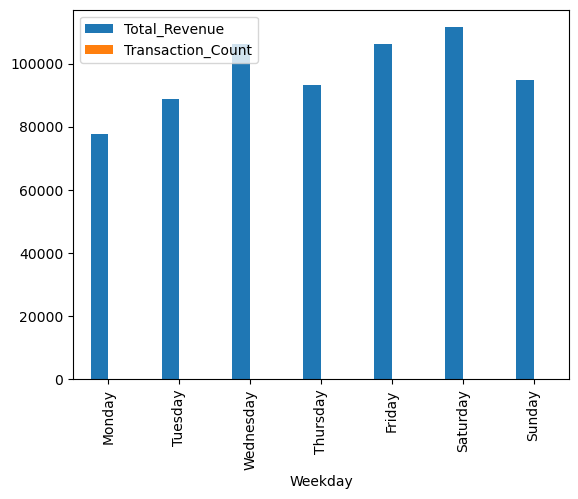

In [57]:
plt.figure(figsize=(10,5))
weekday_sales[['Total_Revenue','Transaction_Count']].plot(kind='bar')


<Axes: xlabel='Month'>

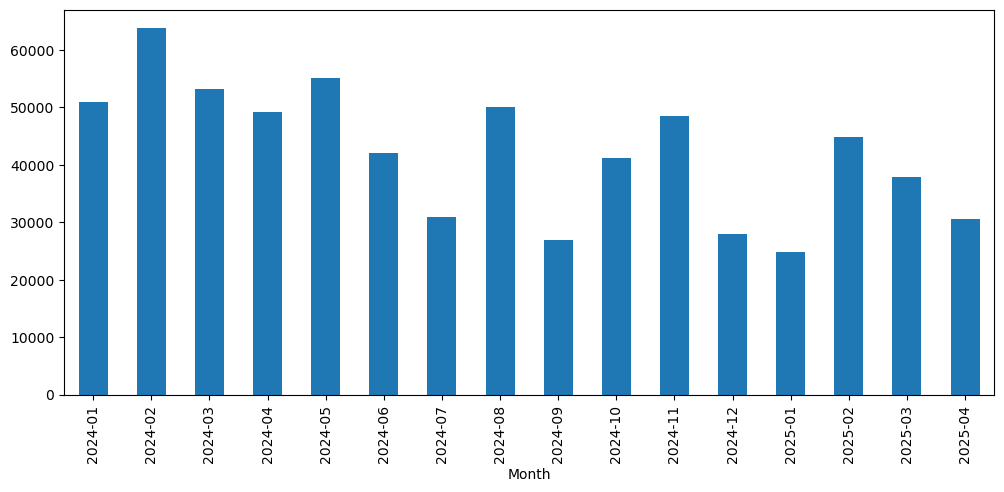

In [58]:
plt.figure(figsize=(12,5))
monthly_sales['Total_Revenue'].plot(kind='bar')


<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='Date'>

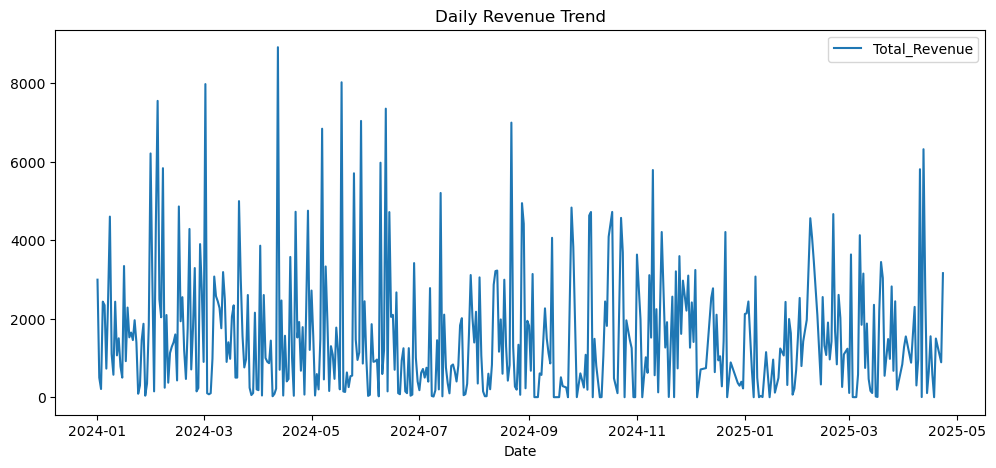

In [59]:

daily_trend=df.groupby(df['Date'].dt.date).agg(
    Total_Revenue=('Total Revenue','sum')
)


daily_trend.plot(y='Total_Revenue', kind='line', figsize=(12,5), title="Daily Revenue Trend")


<Axes: title={'center': 'Revenue by season'}, xlabel='Season'>

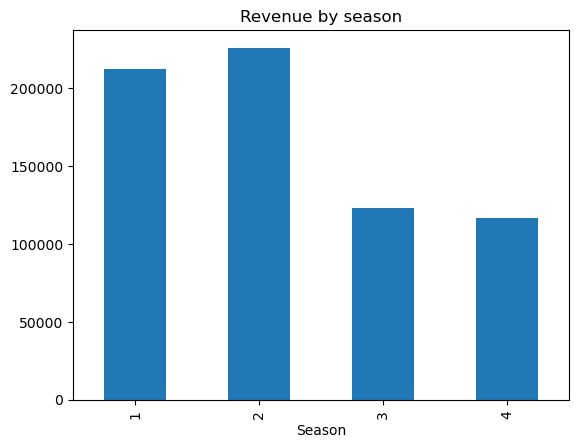

In [60]:
seasonal_sales['Total_Revenue'].plot(kind='bar', title="Revenue by season")